
[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip
Index(['Datum', 'Bewoelkung', 'Temperatur', 'Windgeschwindigkeit',
       'Wettercode', 'id', 'Warengruppe', 'Umsatz', 'KiWo', 'Ferien',
       'Is_Ferien', 'Holiday', 'ID', 'Wochentag', 'Is_Weekend',
       'Weihnachten_Sommer', 'Christmas_Sales', 'Ferien_Category',
       'Temperature_Category', 'Windgeschwindigkeit_Beaufort', 'Rain_Status',
       'Cloud_Status', 'Warengruppe_1', 'Warengruppe_2', 'Warengruppe_3',
       'Warengruppe_4', 'Warengruppe_5', 'Warengruppe_6'],
      dtype='object')


/tmp/ipykernel_60952/548900657.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x='Wochentag', y='Umsatz', data=wetter_umsatzdaten_kiwo, order=weekday_order, ci=95, capsize=0.1)


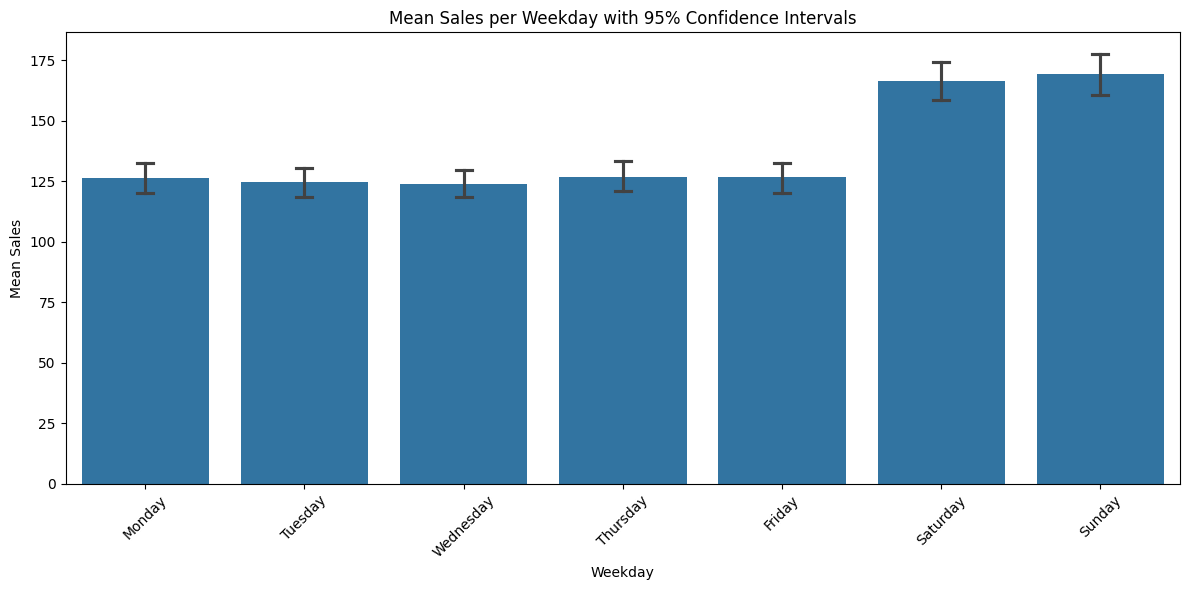

/tmp/ipykernel_60952/548900657.py:27: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x='Christmas_Sales', y='Umsatz', data=wetter_umsatzdaten_kiwo, ci=95, capsize=0.1)


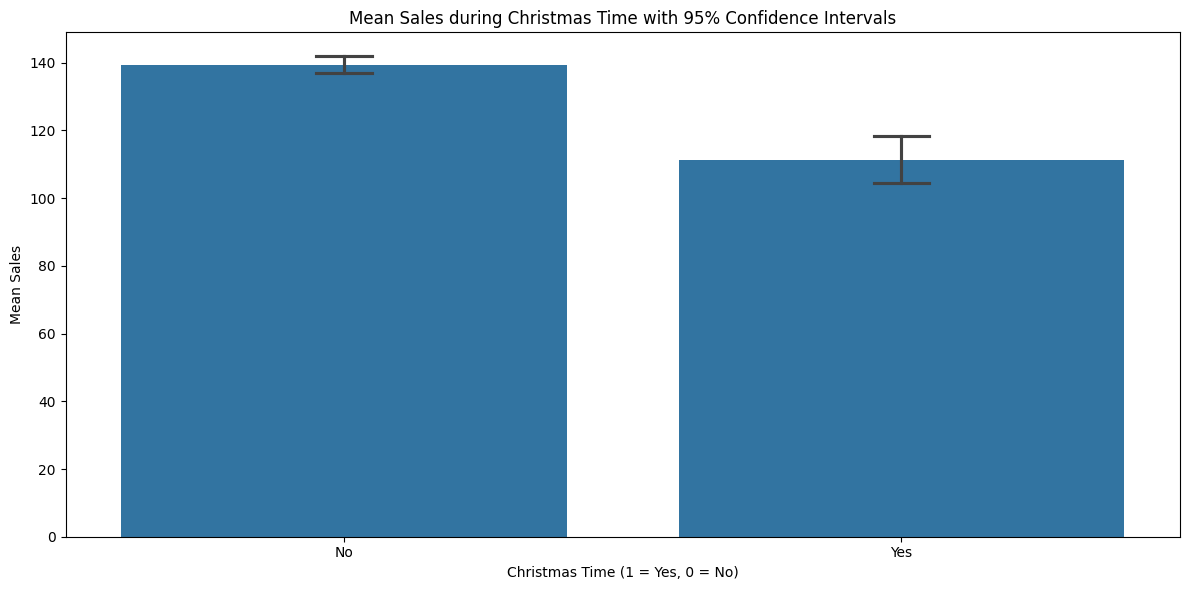

/tmp/ipykernel_60952/548900657.py:37: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x='Ferien', y='Umsatz', data=wetter_umsatzdaten_kiwo, ci=95, capsize=0.1)


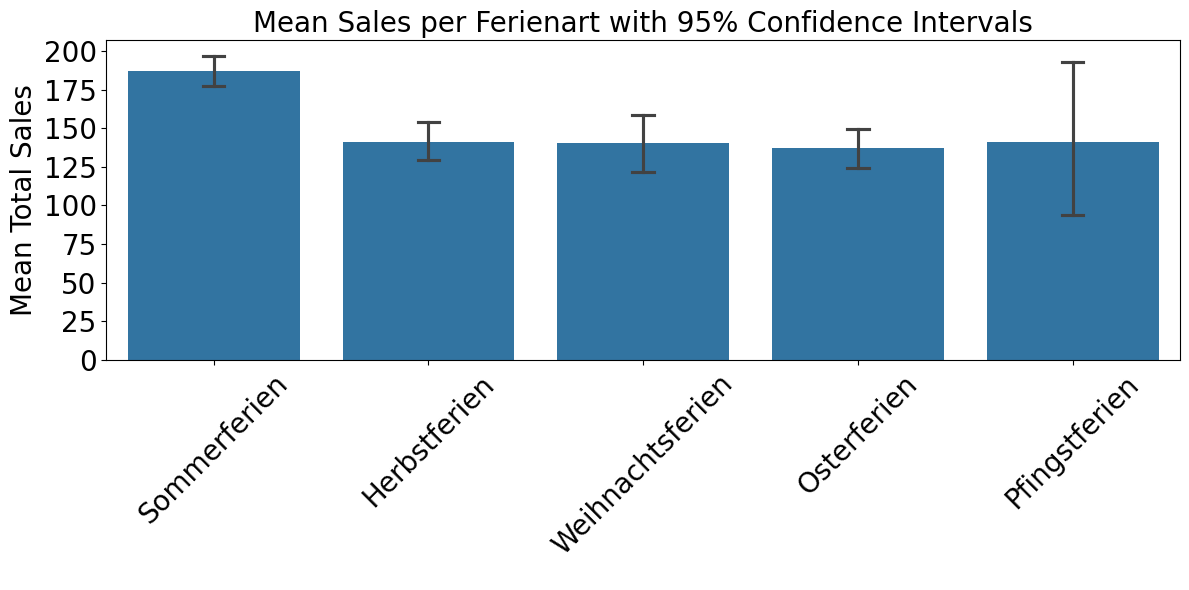

/tmp/ipykernel_60952/548900657.py:48: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x='Holiday', y='Umsatz', data=wetter_umsatzdaten_kiwo, ci=95, capsize=0.1)


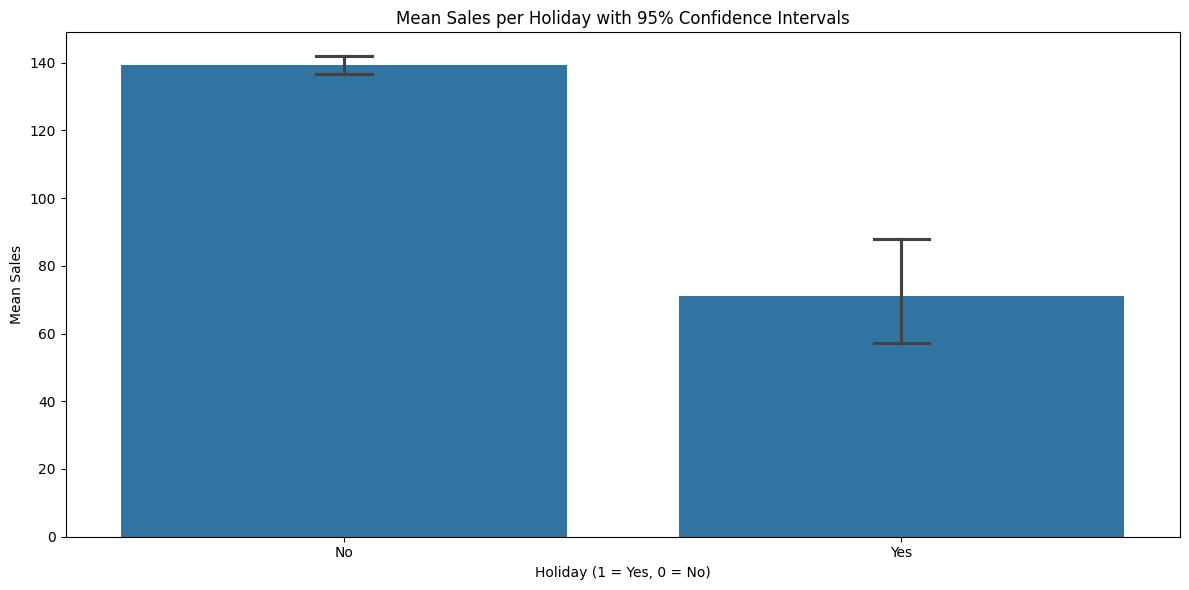

/tmp/ipykernel_60952/548900657.py:60: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x='Month', y='Umsatz', data=wetter_umsatzdaten_kiwo, ci=95, capsize=0.1)


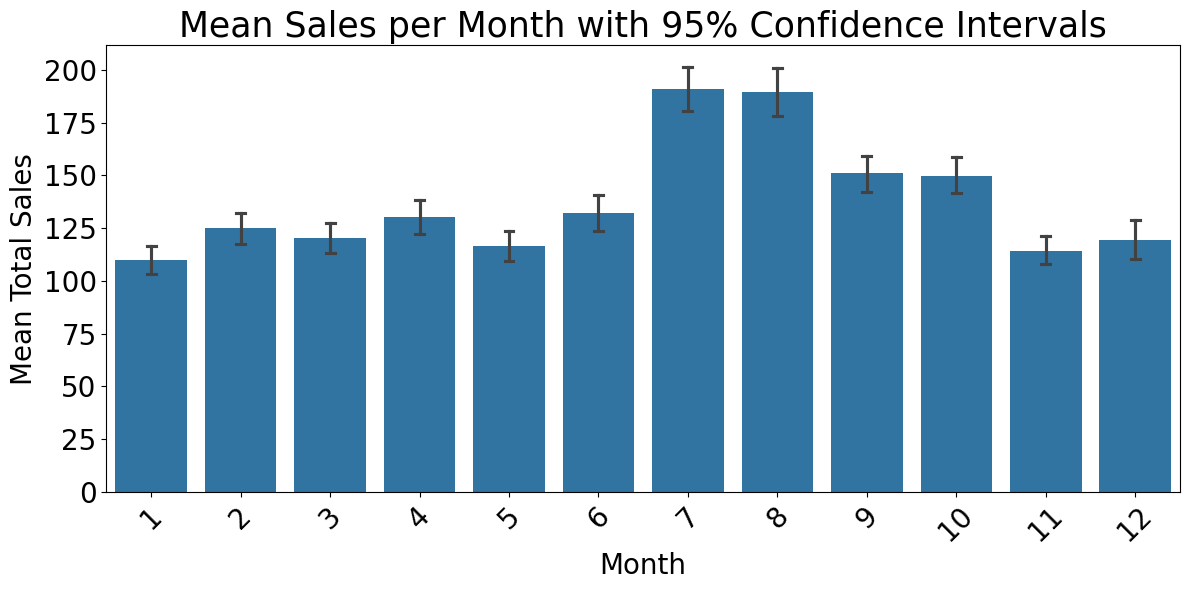

/tmp/ipykernel_60952/548900657.py:71: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x='Bewoelkung', y='Umsatz', data=wetter_umsatzdaten_kiwo, ci=95, capsize=0.1)


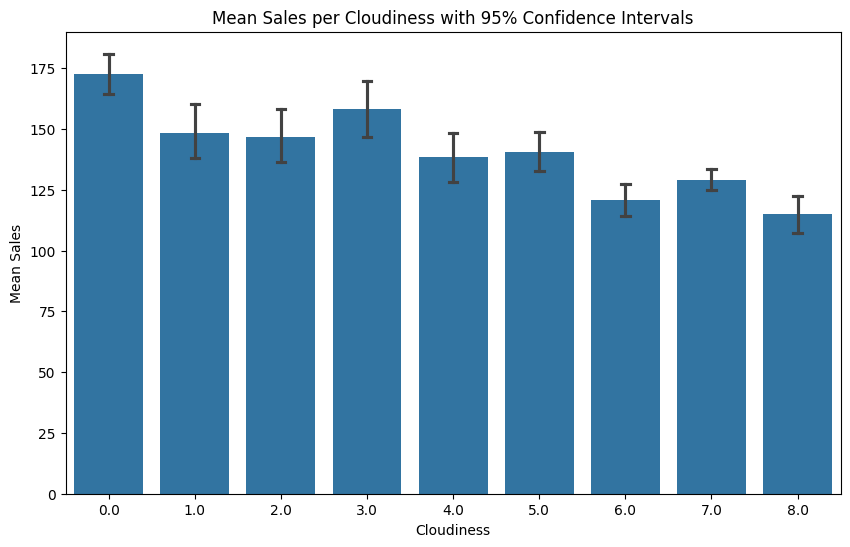

/tmp/ipykernel_60952/548900657.py:79: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x='Cloud_Status', y='Umsatz', data=wetter_umsatzdaten_kiwo, ci=95, capsize=0.1)


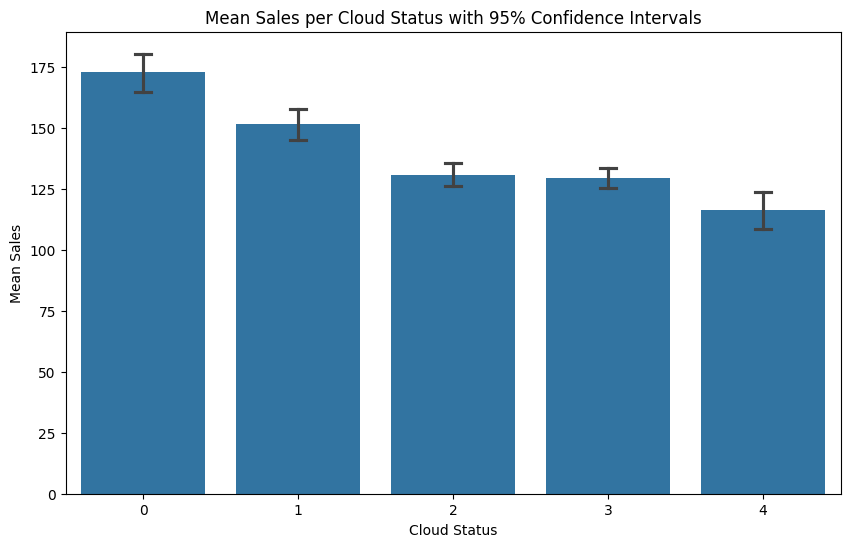

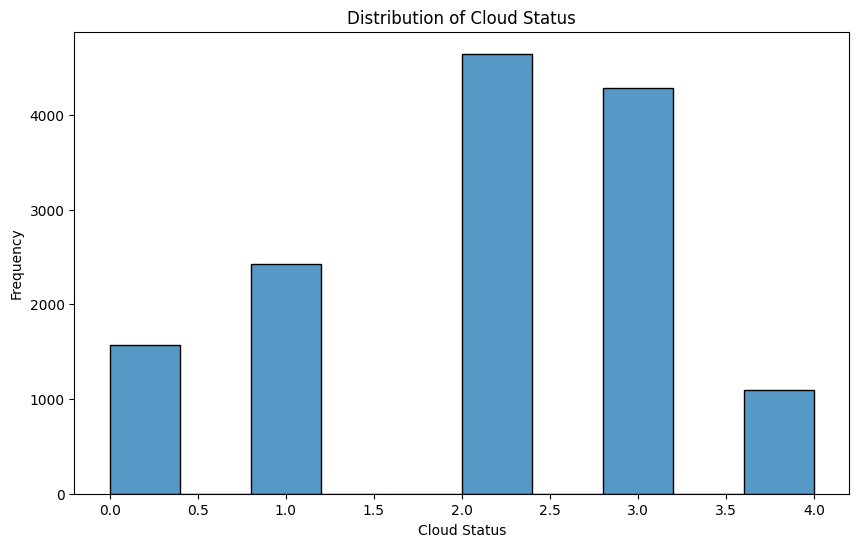

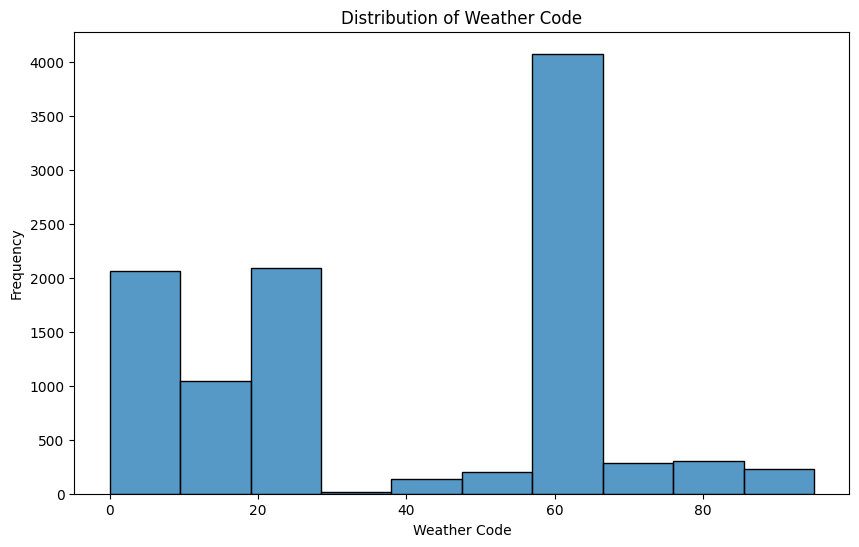

Descriptive Statistics for Windgeschwindigkeit:
count    14028.000000
mean        11.198389
std          4.126458
min          3.000000
25%          8.000000
50%         10.000000
75%         14.000000
max         35.000000
Name: Windgeschwindigkeit, dtype: float64
count    14028.000000
mean         5.650057
std          1.360702
min          2.000000
25%          5.000000
50%          5.000000
75%          7.000000
max         12.000000
Name: Windgeschwindigkeit_Beaufort, dtype: float64
Descriptive Statistics for Temperatur:
count    14028.000000
mean        11.968318
std          7.144229
min        -10.250000
25%          6.375000
50%         11.725000
75%         17.637500
max         32.671428
Name: Temperatur, dtype: float64
count    13968.000000
mean         4.840564
std          2.565585
min          0.000000
25%          3.000000
50%          6.000000
75%          7.000000
max          8.000000
Name: Bewoelkung, dtype: float64
count    14028.000000
mean         2.065797
std   

In [15]:
# DataVis.ipynb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install missingno
import missingno as msno
!pip install fancyimpute
from fancyimpute import IterativeImputer, KNN

# Load the processed dataset
wetter_umsatzdaten_kiwo = pd.read_csv("../0_DataPreparation/processed_data.csv")
print(wetter_umsatzdaten_kiwo.columns)

# Step 1: Visualization - Mean sales per weekday
plt.figure(figsize=(12, 6))
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.barplot(x='Wochentag', y='Umsatz', data=wetter_umsatzdaten_kiwo, order=weekday_order, ci=95, capsize=0.1)
plt.title('Mean Sales per Weekday with 95% Confidence Intervals')
plt.ylabel('Mean Sales')
plt.xlabel('Weekday')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 1.1: Visualization - Mean sales during Christmas time
plt.figure(figsize=(12, 6))
sns.barplot(x='Christmas_Sales', y='Umsatz', data=wetter_umsatzdaten_kiwo, ci=95, capsize=0.1)
plt.title('Mean Sales during Christmas Time with 95% Confidence Intervals')
plt.ylabel('Mean Sales')
plt.xlabel('Christmas Time (1 = Yes, 0 = No)')
plt.xticks([0, 1], ['No', 'Yes'])
plt.tight_layout()
plt.show()

# Step 1.2: Visualization - Mean sales per Ferienart
plt.figure(figsize=(12, 6))
sns.barplot(x='Ferien', y='Umsatz', data=wetter_umsatzdaten_kiwo, ci=95, capsize=0.1)
plt.title('Mean Sales per Ferienart with 95% Confidence Intervals', fontsize=20)
plt.ylabel('Mean Total Sales', fontsize=20)
plt.xlabel(' ')
plt.xticks(rotation=45, fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
plt.show()

# Step 1.2.1: Visualization - Mean sales per Holiday
plt.figure(figsize=(12, 6))
sns.barplot(x='Holiday', y='Umsatz', data=wetter_umsatzdaten_kiwo, ci=95, capsize=0.1)
plt.title('Mean Sales per Holiday with 95% Confidence Intervals')
plt.ylabel('Mean Sales')
plt.xlabel('Holiday (1 = Yes, 0 = No)')
plt.xticks([0, 1], ['No', 'Yes'])
plt.tight_layout()
plt.show()


# Step 1.3: Visualization - Mean sales per month
wetter_umsatzdaten_kiwo['Month'] = pd.to_datetime(wetter_umsatzdaten_kiwo['Datum']).dt.month
plt.figure(figsize=(12, 6))
sns.barplot(x='Month', y='Umsatz', data=wetter_umsatzdaten_kiwo, ci=95, capsize=0.1)
plt.title('Mean Sales per Month with 95% Confidence Intervals', fontsize=25)
plt.ylabel('Mean Total Sales', fontsize=20)
plt.xlabel('Month', fontsize=20)
plt.xticks(rotation=45, fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
plt.show()

#barplot of Bewölkung and the sales
plt.figure(figsize=(10, 6))
sns.barplot(x='Bewoelkung', y='Umsatz', data=wetter_umsatzdaten_kiwo, ci=95, capsize=0.1)
plt.title('Mean Sales per Cloudiness with 95% Confidence Intervals')
plt.ylabel('Mean Sales')
plt.xlabel('Cloudiness')
plt.show()

#barplot of CLoud_Status and the sales
plt.figure(figsize=(10, 6))
sns.barplot(x='Cloud_Status', y='Umsatz', data=wetter_umsatzdaten_kiwo, ci=95, capsize=0.1)
plt.title('Mean Sales per Cloud Status with 95% Confidence Intervals')
plt.ylabel('Mean Sales')
plt.xlabel('Cloud Status')
plt.show()

#visualization of cloud status
plt.figure(figsize=(10, 6))
sns.histplot(wetter_umsatzdaten_kiwo['Cloud_Status'], kde=False, bins=10)
plt.title('Distribution of Cloud Status')
plt.xlabel('Cloud Status')
plt.ylabel('Frequency')
plt.show()

#visualization of the weather code
plt.figure(figsize=(10, 6))
sns.histplot(wetter_umsatzdaten_kiwo['Wettercode'], kde=False, bins=10)
plt.title('Distribution of Weather Code')
plt.xlabel('Weather Code')
plt.ylabel('Frequency')
plt.show()


# Step 3: Descriptive Statistics
print("Descriptive Statistics for Windgeschwindigkeit:")
print(wetter_umsatzdaten_kiwo['Windgeschwindigkeit'].describe())
print(wetter_umsatzdaten_kiwo['Windgeschwindigkeit_Beaufort'].describe())
print("Descriptive Statistics for Temperatur:")
print(wetter_umsatzdaten_kiwo['Temperatur'].describe())
print(wetter_umsatzdaten_kiwo['Bewoelkung'].describe())
print(wetter_umsatzdaten_kiwo['Cloud_Status'].describe())
print(wetter_umsatzdaten_kiwo['Wettercode'].describe())

print("Data visualization complete.")


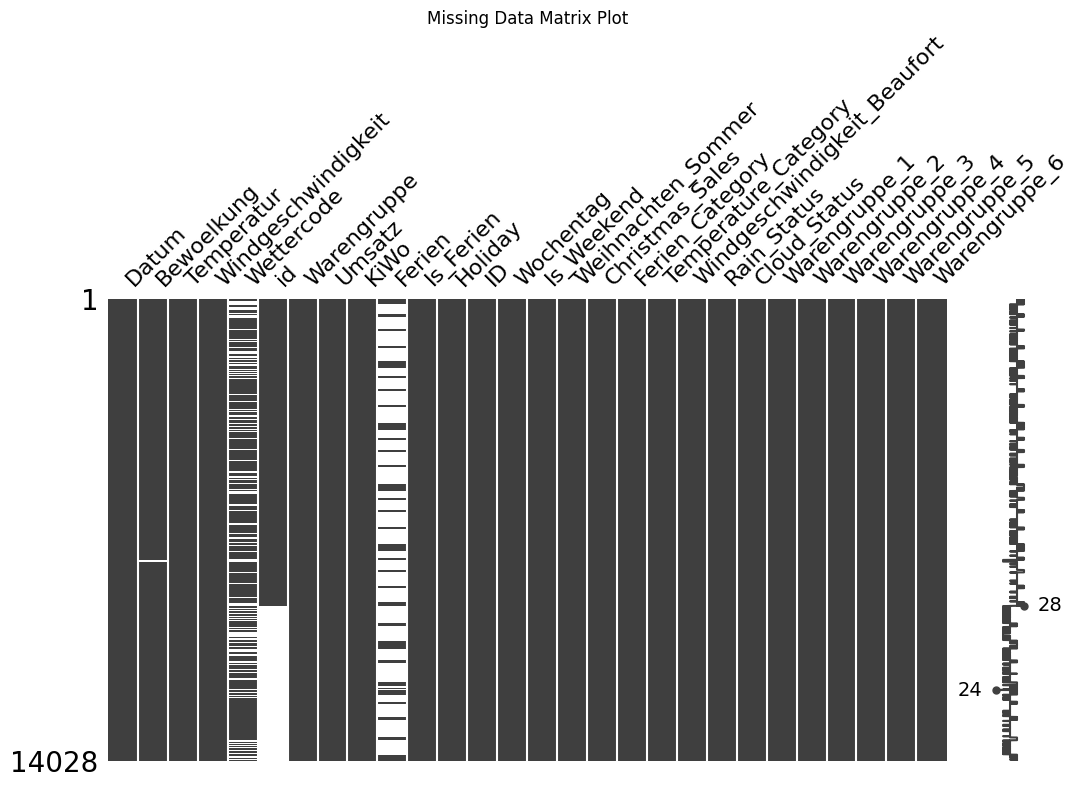

In [6]:
#Load the data
data = pd.read_csv("../0_DataPreparation/processed_data.csv")

#Visualize missing data for 'Bewoelkung'
msno.matrix(data, figsize=(12, 6))
plt.title('Missing Data Matrix Plot')
plt.show()




In [ ]:
#barplot of complete data
msno.bar(data, figsize=(12, 6))
plt.title('Data Completeness Bar Plot')
plt.show()


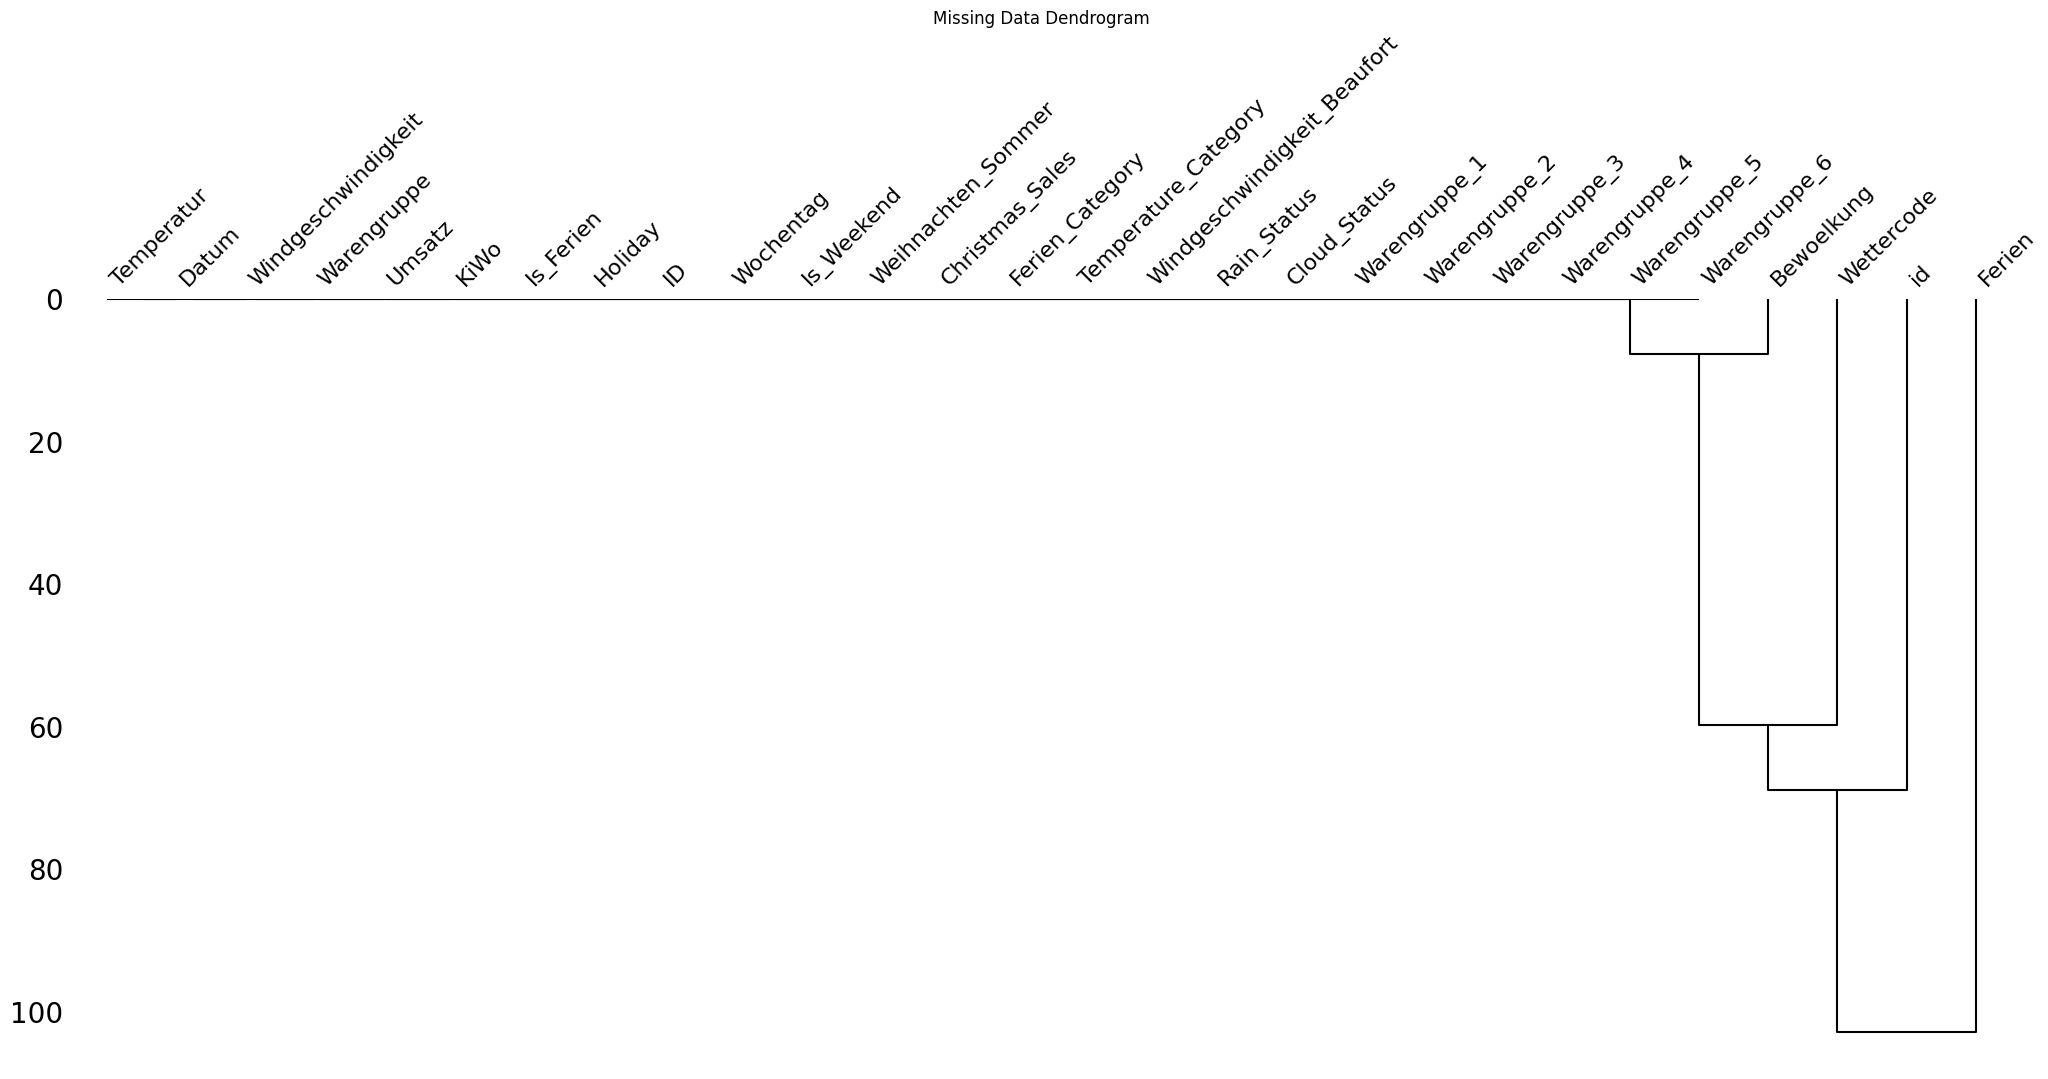

In [7]:
msno.dendrogram(data)
plt.title('Missing Data Dendrogram')
plt.show()

# Imputation of missing data

In [ ]:
#create a mask for the missing values in Bewoelkung
mask_cloudiness = data['Bewoelkung'].isna()
#create a mask for the missing values in Wettercode
mask_weathercode = data['Wettercode'].isna()

# KNN imputation

In [17]:
imputer_KNN = KNN()
data_knn = pd.DataFrame(imputer_KNN.fit_transform(data[['Bewoelkung', 'Wettercode']]), columns=['Bewoelkung', 'Wettercode'])

Imputing row 1/14028 with 0 missing, elapsed time: 14.782
Imputing row 101/14028 with 1 missing, elapsed time: 14.785
Imputing row 201/14028 with 0 missing, elapsed time: 14.787
Imputing row 301/14028 with 0 missing, elapsed time: 14.789
Imputing row 401/14028 with 1 missing, elapsed time: 14.790
Imputing row 501/14028 with 1 missing, elapsed time: 14.793
Imputing row 601/14028 with 0 missing, elapsed time: 14.794
Imputing row 701/14028 with 0 missing, elapsed time: 14.795
Imputing row 801/14028 with 0 missing, elapsed time: 14.797
Imputing row 901/14028 with 0 missing, elapsed time: 14.797
Imputing row 1001/14028 with 0 missing, elapsed time: 14.798
Imputing row 1101/14028 with 0 missing, elapsed time: 14.799
Imputing row 1201/14028 with 0 missing, elapsed time: 14.800
Imputing row 1301/14028 with 0 missing, elapsed time: 14.802
Imputing row 1401/14028 with 0 missing, elapsed time: 14.803
Imputing row 1501/14028 with 0 missing, elapsed time: 14.805
Imputing row 1601/14028 with 1 missi